# Section 1: Machine Learning - Basic (30 poin)


Anda diminta untuk membuat sebuah diagram pipeline untuk membuat model yang nantinya akan dijalankan secara otomatis oleh tim Ops. Susunlah komponen-komponen berikut berdasarkan urutan yang benar dan selanjutnya berikan alasan mengapa anda menyusun pipeline seperti itu (akan lebih baik disertai dengan sumber referensi untuk menguatkan pernyataan anda)

Modeling
Import Data
Train-Test Splitting
Feature Engineering & Selection
Oversampling
Model Selection
Cross-Validation
Data Imputation

Tiap komponen dapat digunakan lebih dari 1 kali. Soal bersifat open-ended, akan dinilai berdasarkan argumentasi

**Jawaban**

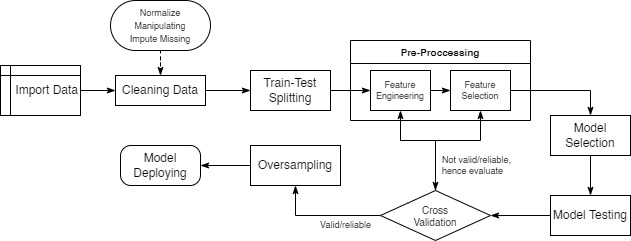

1. First, importing the data from our sources
2. Cleaning Data: The raw data needs to be cleaned. Exploring patterns in the data can help data scientists determine features for the models. Anomaly values and outliers will have to be removed from the data. To overcome this error, there are 2 processes, namely deleting or manipulating it with imputation data so that the data can be filled with values estimated by other predictive models.
3. Train-Data Spitting: the data must be transformed and then split into the train. This is done at the first time hence we can effectively clean the next data. Train and split data is done before pre-processing the data to make it more accurate in prediction
4. Pre-processing:

  a.) Feature engineering is done at first so that the data is optimized for each different type of data

  b.) The selection of features is carried out at a next process so we can choose the features that most contribute to the predictive variable. This is an important step before going to the model selection proccess, because most of machine learning algorithms perform better when selecting good features. And one of the main reasons for the overfit of machine learning models is because of redundancy in our data, therefore feature selection should be done before we chose model selection.
5. Model Selection: then we can choose a machine learning model
6. Model Testing: The next phase ensures that the data modeling effort is able to match expectations. The modeling results will be applied to the test data to check the accuracy and features in it. We can test the data modeling further to identify any adjustments to improve performance and desired results.
7. Cross Validation: an additional method of data mining techniques that aims to obtain maximum accuracy results. If the accuracy is lacking and the description of the descriptive analysis is not good, then we have the option to do re-pre-processing. In cross-validation, we also check for the possibility that the model is under- or over-fit to the data.
8. Oversampling: oversampling takes the observed rare sample and applies bootstrap to generate new random data based on the distribution function. If Cross-Validation is applied after oversampling, basically what is done is overfitting the model with certain artificial bootstrap results. That's why Cross-Validation should be done before we oversampling the data
9. Model deploying: This is the final process in building a machine learning model, namely the deployment process. This process applies directly to the problem to see the predictions of the existing data.


*Referensi*
* https://www.dqlab.id/digital-transformation-pahami-teknik-pengolahan-ini-dalam-industri-data
* https://towardsdatascience.com/pipeline-oriented-data-analytics-with-spark-ml-c664befe1c2d
* https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after
* https://innovation.alteryx.com/feature-engineering-vs-feature-selection
* https://www.anbidev.com/machine-learning-how-to-deal
* https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f
* https://socs.binus.ac.id/2019/12/26/imbalanced-dataset/
* https://www.anakteknik.co.id/krysnayudhamaulana/articles/8-proses-dan-tahapan-machine-learning

# Section 2: Explanatory Model Analysis: Model Dependent - Advanced (70 poin)

## Install and Load Package ##

In [ ]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot

     |████████████████████████████████| 106 kB 5.3 MB/s 


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import date time
from datetime import datetime, date
# import scipy stat for basic statistic
import scipy.stats as st
# import seaborn
import seaborn as sns

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Dataset ##

In [ ]:
# marketing campaign
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_response_model/marketing_campaign.csv",sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Pre-Processing Data ##

In [ ]:
#Add Colum Age
age = 2015 - df["Year_Birth"]
df['Age'] = age
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,48
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,69
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,34
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,59


In [ ]:
#Delete variable that not relevan
marketing = df.drop(['Marital_Status','ID','Year_Birth','Education','Kidhome','Teenhome','Z_CostContact','Z_Revenue'],axis=1)
marketing.columns

Index(['Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age'],
      dtype='object')

In [ ]:
#Check Null Values
marketing.isnull().sum()

Income                 24
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
dtype: int64

In [ ]:
#Drop Null Values
marketing = marketing.dropna()
marketing.isnull().sum()

Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
dtype: int64

### 1.) Simple EDA

In [ ]:
# check correlation matrix of df1
marketing_corr = round(marketing.corr(),2)
marketing_corr

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
Income,1.00,-0.00,0.58,0.43,0.58,0.44,0.44,0.33,-0.08,0.39,...,0.53,-0.55,-0.02,0.18,0.34,0.28,0.09,-0.03,0.13,0.16
Recency,-0.00,1.00,0.02,-0.01,0.02,0.00,0.03,0.02,0.00,-0.01,...,-0.00,-0.02,-0.03,0.02,-0.00,-0.02,-0.00,0.01,-0.20,0.02
MntWines,0.58,0.02,1.00,0.39,0.57,0.40,0.39,0.39,0.01,0.55,...,0.64,-0.32,0.06,0.37,0.47,0.35,0.21,-0.04,0.25,0.16
MntFruits,0.43,-0.01,0.39,1.00,0.55,0.59,0.57,0.40,-0.13,0.30,...,0.46,-0.42,0.01,0.01,0.21,0.19,-0.01,-0.01,0.12,0.02
MntMeatProducts,0.58,0.02,0.57,0.55,1.00,0.57,0.54,0.36,-0.12,0.31,...,0.49,-0.54,0.02,0.09,0.38,0.31,0.04,-0.02,0.24,0.03
MntFishProducts,0.44,0.00,0.40,0.59,0.57,1.00,0.58,0.43,-0.14,0.30,...,0.46,-0.45,-0.00,0.02,0.20,0.26,0.00,-0.02,0.11,0.04
MntSweetProducts,0.44,0.03,0.39,0.57,0.54,0.58,1.00,0.36,-0.12,0.33,...,0.46,-0.42,0.00,0.03,0.26,0.25,0.01,-0.02,0.12,0.02
MntGoldProds,0.33,0.02,0.39,0.40,0.36,0.43,0.36,1.00,0.05,0.41,...,0.39,-0.25,0.12,0.02,0.18,0.17,0.05,-0.03,0.14,0.06
NumDealsPurchases,-0.08,0.00,0.01,-0.13,-0.12,-0.14,-0.12,0.05,1.00,0.24,...,0.07,0.35,-0.02,0.02,-0.18,-0.13,-0.04,0.00,0.00,0.06
NumWebPurchases,0.39,-0.01,0.55,0.30,0.31,0.30,0.33,0.41,0.24,1.00,...,0.52,-0.05,0.04,0.16,0.14,0.16,0.03,-0.02,0.15,0.15


Pada matrix korelasi di atas, variabel yang memiliki korelasi positif tertinggi terhadap variabel Response adalah AcceptedCmp5 sebesar 32%, hal ini diduga karena konsumen yang merespon marketing campaign terakhir adalah konsumen yang juga merespon marketing campaign ke-5.

Sedangkan variabel yang memiliki korelasi negatif tertinggi terhadap variabel Response adalah Recency yaitu sebesar 20%, hal ini bisa disimpulkan jika semakin lama konsumen tidak bertransaksi maka semakin tidak merespon marketing campaign.

Namun demikian, korelasi yang nilainya dibawah 50 dikatakan korelasi yang rendah, ditambah Simple EDA ini tidak mencerminkan hubungan yang sesungguhnya. Maka dari itu perlu adanya regresi pada machine learning untuk membuktikan hubungan terhadap variabel target.


## Train-Split Data

In [ ]:
# assign 'response' column to y 
y = marketing['Response'].values
# assign AcceptedCmpX (1-5) and Recency to X
X = marketing[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Recency']].values

In [ ]:
# check y dimension
y.shape

(2216,)

In [ ]:
# check X dimension
X.shape

(2216, 6)

In [ ]:
# split data to train and test data
# with test size is 30% of overall data
# use stratified sampling
# and set RNG to 1000
X_train_marketing, X_test_marketing, y_train_marketing, y_test_marketing = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [ ]:
# Check X_train_marketing dimension
X_train_marketing.shape

(1551, 6)

In [ ]:
# check y_train_marketing class distribution
np.unique(y_train_marketing, return_counts=True)[1]

array([1318,  233])

In [ ]:
# check X_test_marketing dimension
X_test_marketing.shape

(665, 6)

In [ ]:
# check y_test_marketing class distribution
np.unique(y_test_marketing, return_counts=True)[1]

array([565, 100])

In [ ]:
marketing.dtypes

Income                 float64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
dtype: object

### 2.) Model Dependent Method

#### 2a.) Logistic Regression ###

##### Modelling Using StatsModel ####

In [ ]:
# add constant to model
X_train_int = sm.add_constant(X_train_marketing)
# define and fit model to data
logistic_reg_sm = sm.Logit(y_train_marketing, X_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.324133
         Iterations 7


In [ ]:
# check summary of model
logistic_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1551
Model:                          Logit   Df Residuals:                     1544
Method:                           MLE   Df Model:                            6
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                  0.2339
Time:                        21:05:08   Log-Likelihood:                -502.73
converged:                       True   LL-Null:                       -656.23
Covariance Type:            nonrobust   LLR p-value:                 2.589e-63
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3150      0.146     -9.037      0.000      -1.600      -1.030
x1             1.4144      0.278      5.083      0.000       0.869       1.960
x2             0.8210      0.665      1.235      0.217      -0.482       2.124
x3             2.0419      0.238      8.576      0.000       1.575       2.509
x4             0.8578      0.277      3.097      0.002       0.315       1.401
x5             1.6453      0.257      6.404      0.000       1.142       2.149
x6            -0.0260      0.003     -8.273      0.000      -0.032      -0.020
==============================================================================
"""

In [ ]:
# check model coefficient
logistic_reg_sm.params

array([-1.31503983,  1.41438406,  0.82101337,  2.04185606,  0.85780808,
        1.64525758, -0.02602386])

##### Modelling using Scikit-Learn ####

In [ ]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train_marketing, y_train_marketing)

LogisticRegression(random_state=1000)

In [ ]:
# check model coefficient
logistic_reg.coef_

array([[ 1.35199762,  0.63713402,  1.92577211,  0.83899828,  1.57935962,
        -0.02552927]])

In [ ]:
# check the intercept
logistic_reg.intercept_

array([-1.29492004])

##### Model Evaluation ####

In [ ]:
# prediction
pred_result = logistic_reg.predict(X_test_marketing)
pred_proba_result = logistic_reg.predict_proba(X_test_marketing)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_marketing, pred_result, target_names=['not response','response'], output_dict=True))

,not response,response,accuracy,macro avg,weighted avg
precision,0.889789,0.666667,0.873684,0.778228,0.856237
recall,0.971681,0.320000,0.873684,0.645841,0.873684
f1-score,0.928934,0.432432,0.873684,0.680683,0.854272
support,565.000000,100.000000,0.873684,665.000000,665.000000


In [ ]:
# check model accuracy
metrics.accuracy_score(y_test_marketing, pred_result)

0.8736842105263158

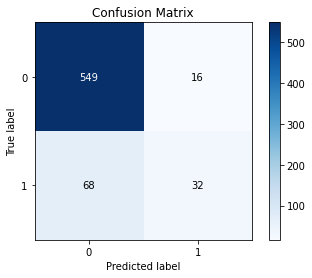

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_marketing, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


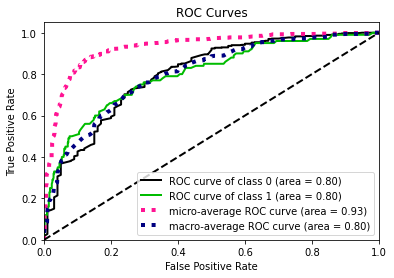

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test_marketing, pred_proba_result);

In [ ]:
# check f1-score
metrics.f1_score(y_test_marketing, pred_result)

0.43243243243243246

##### Model Intepretation ####

In [ ]:
var_name = marketing[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Recency']].columns.tolist()

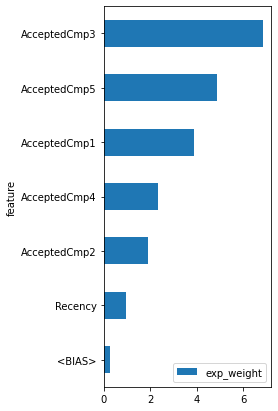

In [ ]:
# plt.rcParams["figure.figsize"] = (3,7)
eli5.explain_weights_df(
    logistic_reg, feature_names= var_name
).assign(
    # create new weight called exp_weight
    exp_weight = lambda x: x['weight'].map(lambda x: np.exp(x))
).sort_values(
    by = "exp_weight"
).plot(
    x = 'feature',
    y = 'exp_weight',
    kind = 'barh',
    figsize = (3,7)
)

#### 2b.) Decision Tree (KNN) ###

##### Modelling ####

In [ ]:
# define regression tree model
tree_clf = DecisionTreeClassifier(random_state = 1000, max_depth = 5)
# fit model to data
tree_clf.fit(X_train_marketing, y_train_marketing)

DecisionTreeClassifier(max_depth=5, random_state=1000)

##### Model Evaluation ####

In [ ]:
# prediction
pred_result = tree_clf.predict(X_test_marketing)
pred_proba_result = tree_clf.predict_proba(X_test_marketing)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_marketing, pred_result, target_names=['not response','response'], output_dict=True))

,not response,response,accuracy,macro avg,weighted avg
precision,0.887821,0.731707,0.878195,0.809764,0.864345
recall,0.980531,0.300000,0.878195,0.640265,0.878195
f1-score,0.931876,0.425532,0.878195,0.678704,0.855734
support,565.000000,100.000000,0.878195,665.000000,665.000000


In [ ]:
# check model accuracy
metrics.accuracy_score(y_test_marketing, pred_result)

0.8781954887218045

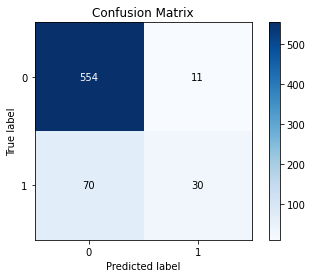

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_marketing, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


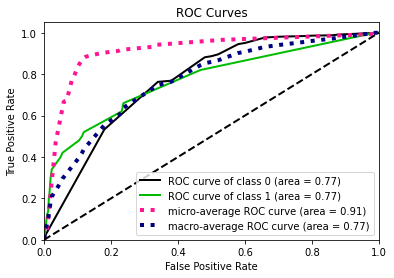

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test_marketing, pred_proba_result);

In [ ]:
# check f1-score
metrics.f1_score(y_test_marketing, pred_result)

0.425531914893617

##### Model Intepretation ####

In [ ]:
plt.rcParams["figure.figsize"] = (70,40)

In [ ]:
var_name = marketing[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Recency']].columns.tolist()

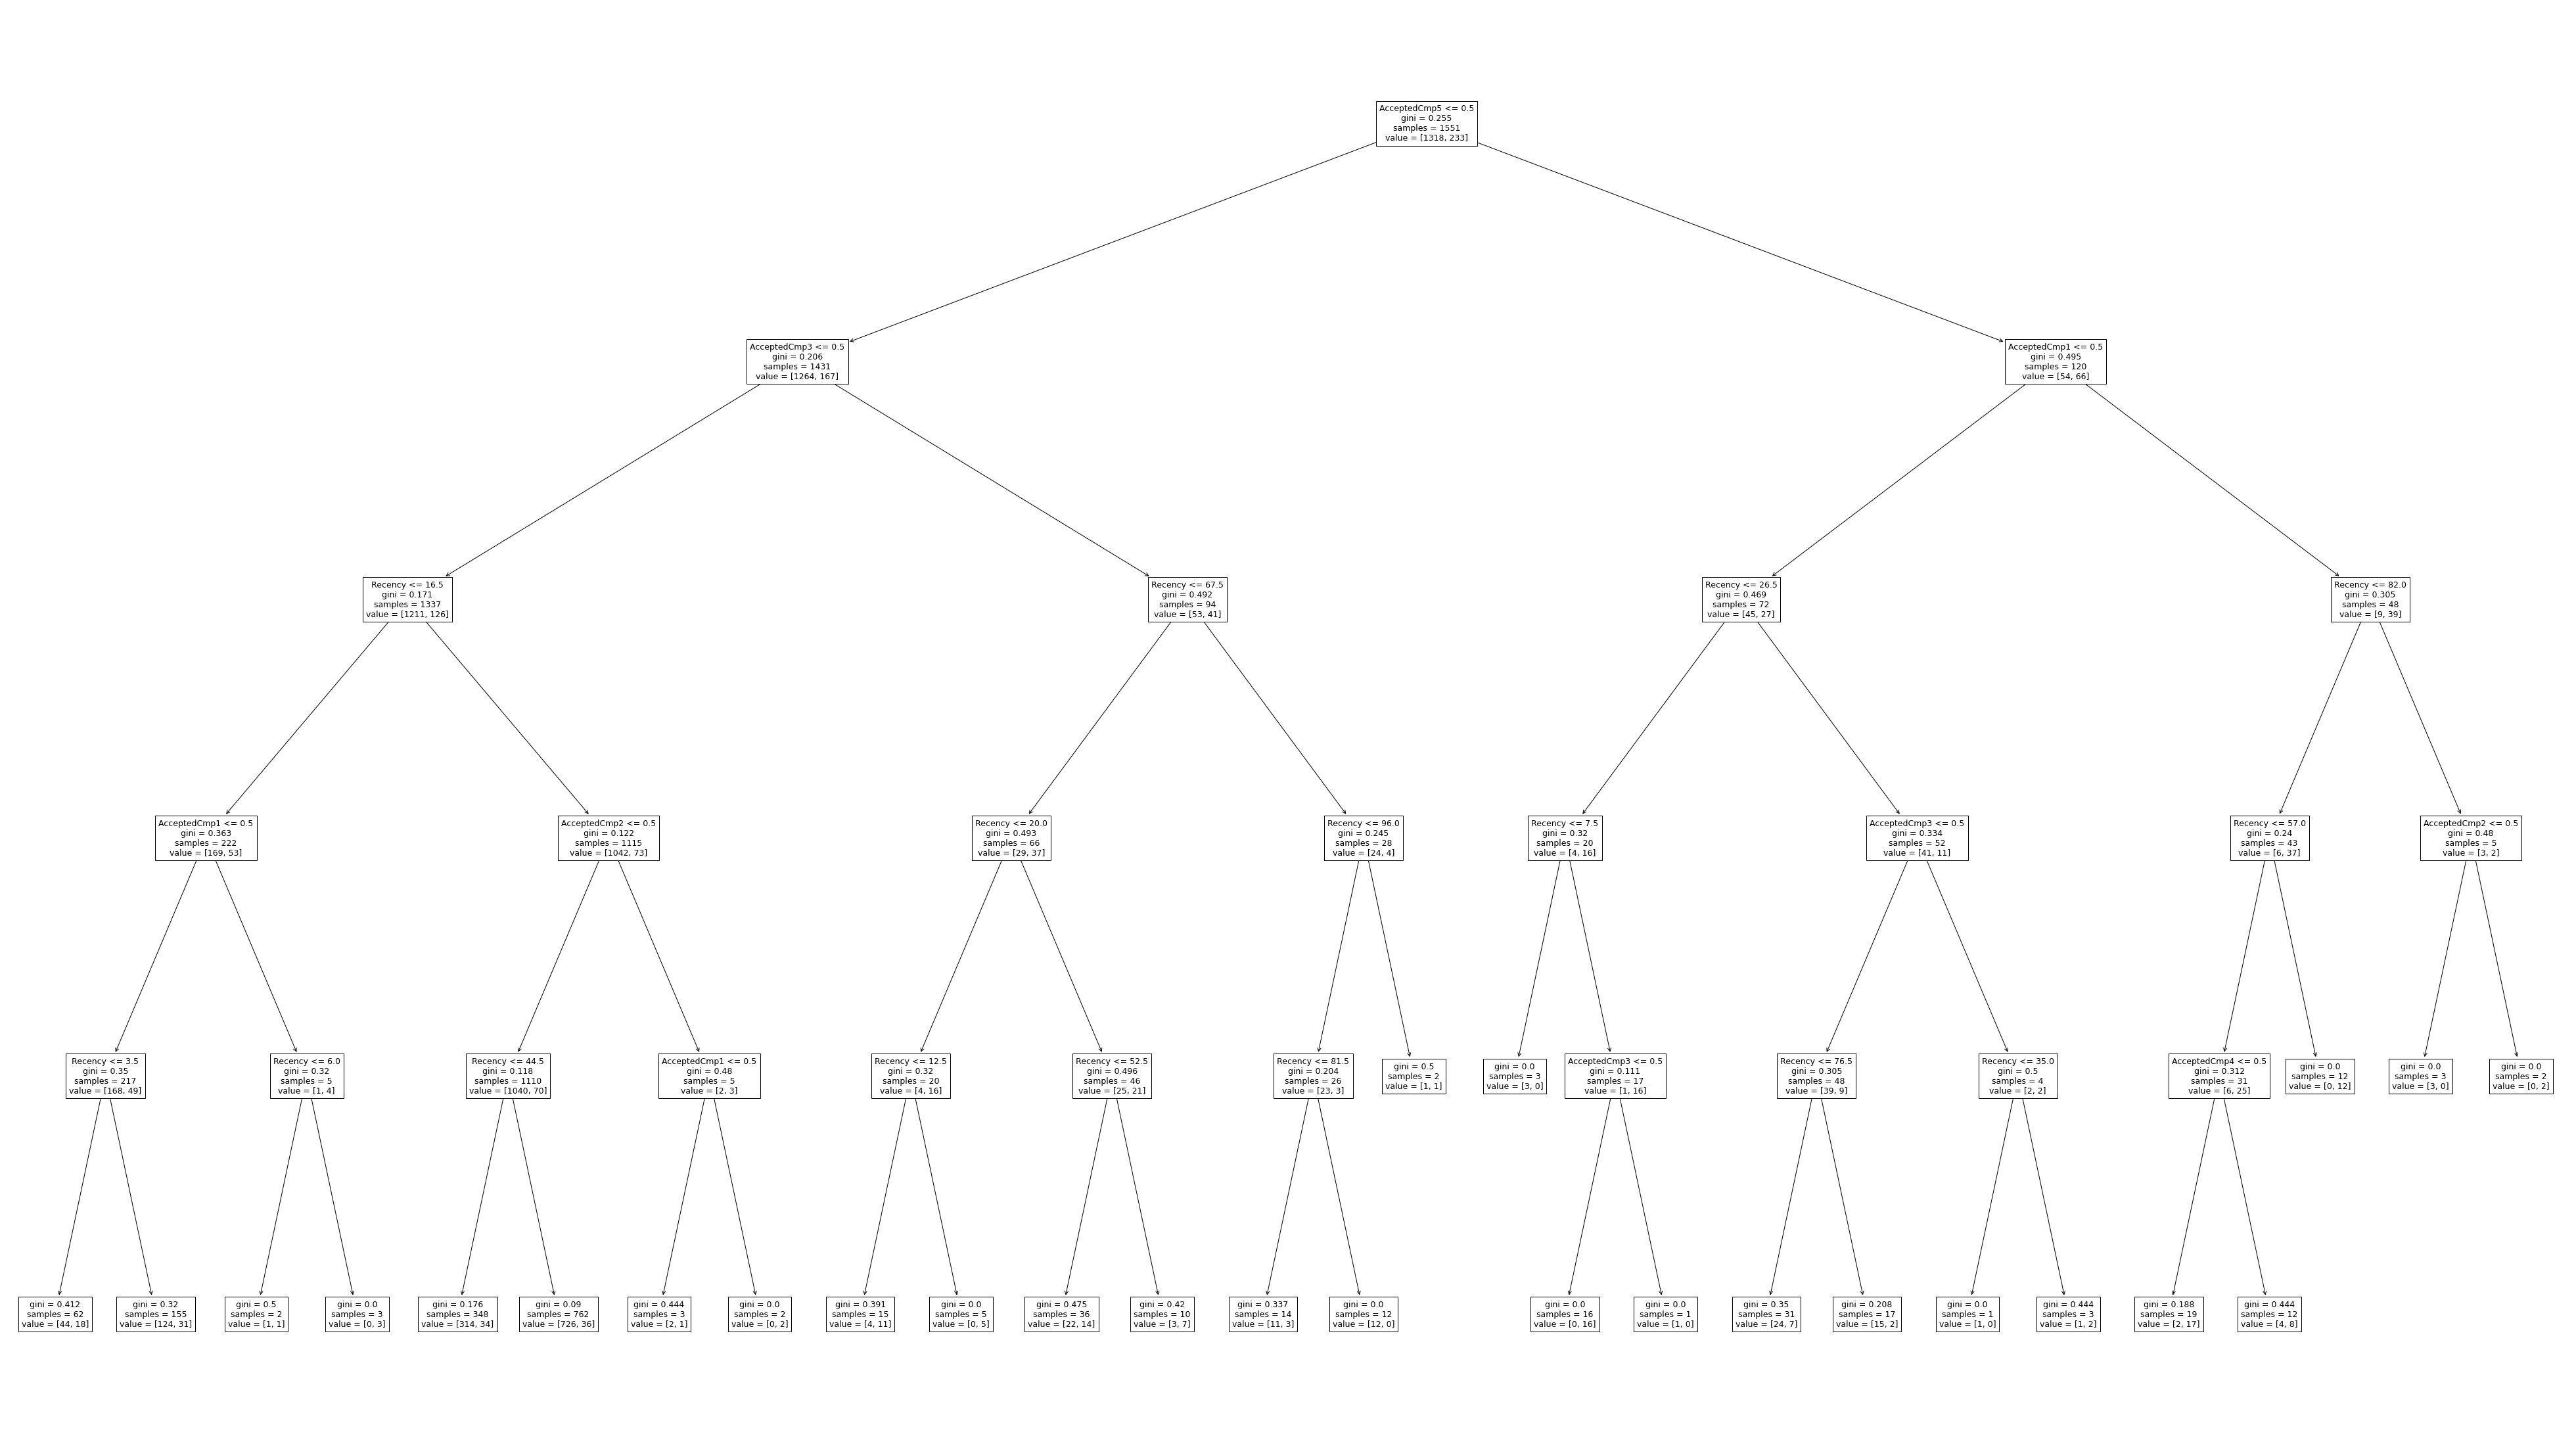

In [ ]:
plot_tree(tree_clf, feature_names = var_name)
plt.show()

###### Tree Visualization using ELI5 ##### 

In [ ]:
eli5.sklearn.explain_decision_tree(tree_clf, feature_names=var_name)

Weight,Feature
0.3433,Recency
0.3172,AcceptedCmp5
0.1766,AcceptedCmp3
0.1169,AcceptedCmp1
0.0402,AcceptedCmp2
0.0058,AcceptedCmp4


In [ ]:
# reset figsize
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

###### Gini Features Importance #####

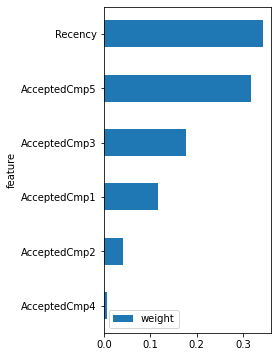

In [ ]:
eli5.explain_weights_df(tree_clf, feature_names=var_name). \
  sort_values(by='weight'). \
  plot(
    x = 'feature', 
    y = 'weight',
    kind = 'barh',
    figsize = (3, 6)
  )

In [ ]:
#Extract Rules

print(export_text(tree_clf, feature_names = var_name))

|--- AcceptedCmp5 <= 0.50
|   |--- AcceptedCmp3 <= 0.50
|   |   |--- Recency <= 16.50
|   |   |   |--- AcceptedCmp1 <= 0.50
|   |   |   |   |--- Recency <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Recency >  3.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- AcceptedCmp1 >  0.50
|   |   |   |   |--- Recency <= 6.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Recency >  6.00
|   |   |   |   |   |--- class: 1
|   |   |--- Recency >  16.50
|   |   |   |--- AcceptedCmp2 <= 0.50
|   |   |   |   |--- Recency <= 44.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Recency >  44.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- AcceptedCmp2 >  0.50
|   |   |   |   |--- AcceptedCmp1 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AcceptedCmp1 >  0.50
|   |   |   |   |   |--- class: 1
|   |--- AcceptedCmp3 >  0.50
|   |   |--- Recency <= 67.50
|   |   |   |--- Recency <= 20.00
|   |   |   |   |--- Recency <= 12.50
|   |   |   |   |   

#### 2c.) Rule Fit ###

##### Modelling ####

In [ ]:
# define RuleFit model
rulefit_clf = SkopeRules(
    n_estimators = 10,
    random_state = 1000,
    max_features = 'sqrt',
    feature_names = var_name
)

# fit model to data
rulefit_clf.fit(X_train_marketing, y_train_marketing)

SkopeRules(feature_names=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                          'AcceptedCmp4', 'AcceptedCmp5', 'Recency'],
           max_features='sqrt', random_state=1000)

In [ ]:
rulefit_clf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1970544363),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1077348022),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=473922508),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2113565594),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1173624936),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1474976016),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1528487102),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1071226617),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=499256588),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=9065945

##### Model Evaluation ####

In [ ]:
# prediction
pred_result = rulefit_clf.predict(X_test_marketing)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_marketing, pred_result, target_names=['not response','response'], output_dict=True))

,not response,response,accuracy,macro avg,weighted avg
precision,0.899174,0.6500,0.876692,0.774587,0.861704
recall,0.962832,0.3900,0.876692,0.676416,0.876692
f1-score,0.929915,0.4875,0.876692,0.708707,0.863386
support,565.000000,100.0000,0.876692,665.000000,665.000000


In [ ]:
# check model accuracy
metrics.accuracy_score(y_test_marketing, pred_result)

0.8766917293233083

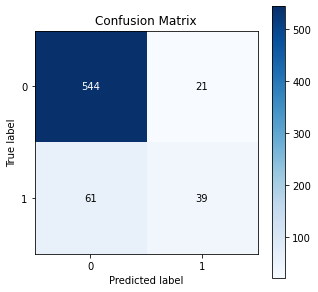

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_marketing, pred_result, figsize=(5,5));

In [ ]:
# check ROC-AUC Curve
scoring = rulefit_clf.score_top_rules(X_test_marketing)
fpr, tpr, _ = metrics.roc_curve(y_test_marketing, scoring)

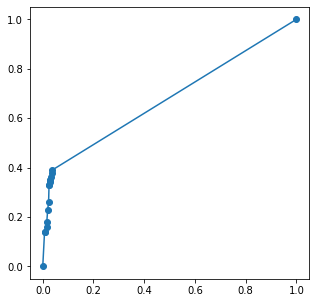

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr, 'o-')
plt.show()

In [ ]:
metrics.auc(fpr, tpr)

0.6774601769911505

###### F1 Score #####

In [ ]:
# check F1-score
metrics.f1_score(y_test_marketing, pred_result)

0.4875

##### Model Intepretation ####

###### Roles Extraction #####

In [ ]:
# extract rules from rule-fit model
rulefit_clf.rules_

[('AcceptedCmp1 > 0.5 and AcceptedCmp5 > 0.5 and Recency <= 82.0',
  (0.9032258064516129, 0.14659685863874344, 2)),
 ('AcceptedCmp1 > 0.5 and AcceptedCmp2 <= 0.5 and AcceptedCmp5 > 0.5',
  (0.8010805657079294, 0.13883802292997274, 6)),
 ('AcceptedCmp1 > 0.5 and AcceptedCmp3 <= 0.5 and AcceptedCmp5 > 0.5',
  (0.8401253918495297, 0.13363756613756614, 4)),
 ('AcceptedCmp1 > 0.5 and AcceptedCmp5 > 0.5 and Recency > 16.5',
  (0.7741935483870968, 0.12435233160621761, 2)),
 ('AcceptedCmp4 > 0.5 and AcceptedCmp5 > 0.5 and Recency <= 90.5',
  (0.6875, 0.12154696132596685, 2)),
 ('AcceptedCmp4 > 0.5 and AcceptedCmp5 > 0.5 and Recency > 15.5',
  (0.6153846153846154, 0.0851063829787234, 2)),
 ('AcceptedCmp1 > 0.5 and AcceptedCmp3 <= 0.5 and Recency <= 24.0',
  (0.8125, 0.06878306878306878, 2)),
 ('AcceptedCmp1 <= 0.5 and AcceptedCmp5 > 0.5 and Recency <= 26.5',
  (0.75, 0.0670391061452514, 2)),
 ('AcceptedCmp3 > 0.5 and AcceptedCmp5 <= 0.5 and Recency <= 15.5',
  (0.7857142857142857, 0.05851063829

In [ ]:
print('The 5 most performing "response rules" are the following one:\n')
for i_rule, rule in enumerate(rulefit_clf.rules_[:5]):
    print(rule[0])

The 5 most performing "response rules" are the following one:

AcceptedCmp1 > 0.5 and AcceptedCmp5 > 0.5 and Recency <= 82.0
AcceptedCmp1 > 0.5 and AcceptedCmp2 <= 0.5 and AcceptedCmp5 > 0.5
AcceptedCmp1 > 0.5 and AcceptedCmp3 <= 0.5 and AcceptedCmp5 > 0.5
AcceptedCmp1 > 0.5 and AcceptedCmp5 > 0.5 and Recency > 16.5
AcceptedCmp4 > 0.5 and AcceptedCmp5 > 0.5 and Recency <= 90.5


###### Rules Importance #####

In [ ]:
# extract rules and its importance
rules = []
evaluation = []
for result in rulefit_clf.rules_:
  rl, evl = result
  rules.append(rl)
  evaluation.append(evl[0])

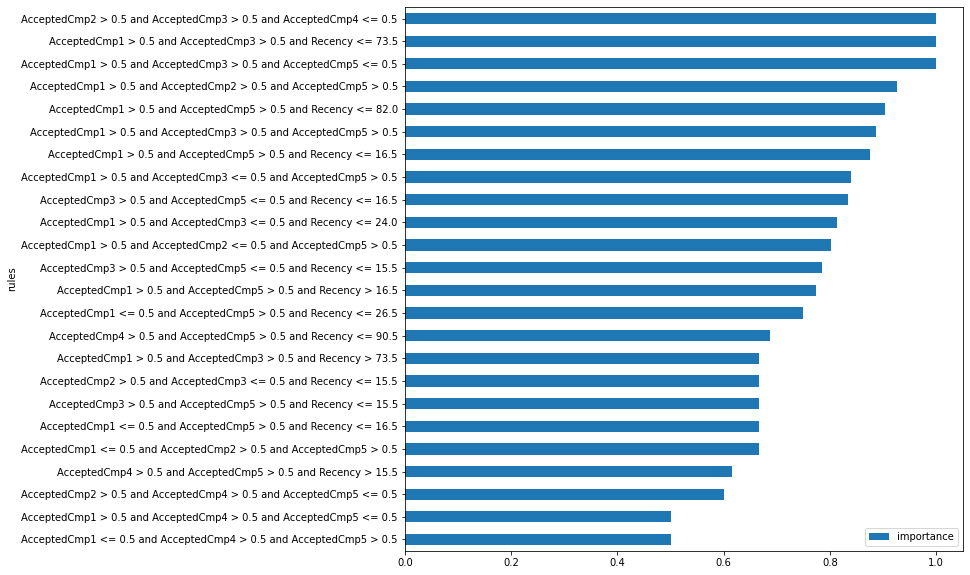

In [ ]:
# visualize
pd.DataFrame(
    {"rules": rules, "importance": evaluation}
).sort_values(
    by = "importance"
).plot(
    x = "rules",
    y = "importance",
    kind = 'barh',
    figsize = (10, 10)
);

#### 2d.) Naive Bayes ###

##### Modelling #####

In [ ]:
#define Gaussian NB Model
gnb = GaussianNB()

#fit the model to data
y_pred = gnb.fit(X_train_marketing, y_train_marketing)
y_pred

GaussianNB()

In [ ]:
#cek score model to data
gnb.score(X_test_marketing, y_test_marketing)

0.8360902255639098

##### Model Evaluation

In [ ]:
# prediction
pred_result = gnb.predict(X_test_marketing)
pred_proba_result = gnb.predict_proba(X_test_marketing)

In [ ]:
# check model accuracy
metrics.accuracy_score(y_test_marketing, pred_result)

0.8360902255639098

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_marketing, pred_result, target_names=['not response','response'], output_dict=True))

,not response,response,accuracy,macro avg,weighted avg
precision,0.917582,0.462185,0.83609,0.689884,0.849102
recall,0.886726,0.550000,0.83609,0.718363,0.836090
f1-score,0.901890,0.502283,0.83609,0.702087,0.841799
support,565.000000,100.000000,0.83609,665.000000,665.000000


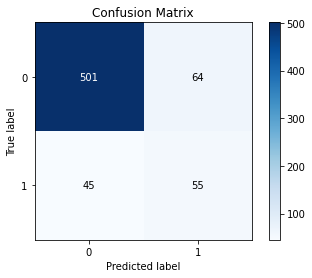

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_marketing, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


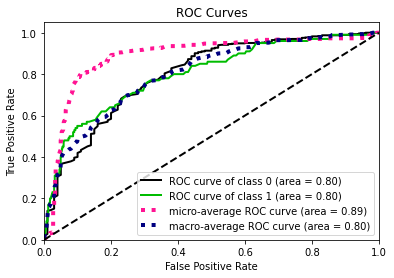

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test_marketing, pred_proba_result);

###### F1 Score

In [ ]:
# check F1-score
metrics.f1_score(y_test_marketing, pred_result)

0.5022831050228311

##### Model Intepretation

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
%(X_test_marketing.shape[0], (y_test_marketing != y_pred).sum()))

Number of mislabeled points out of a total 665 points : 665


In [ ]:
#Predict the probabilities

yprob = gnb.predict_proba(X_test_marketing)
yprob[-8:].round(2)

array([[1.  , 0.  ],
       [0.08, 0.92],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.08, 0.92],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

## Result and Recommendation

### Result

Dari keempat model dependent method di atas, dipilih model yang memiliki nilai Accuracy Score tinggi, diikut dengan nilai Precision yang tinggi juga ([Read More](https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134)). Sehingga, model terbaik yang dipilih adalah model Decision Tree.

Decision Tree pada model ini memiliki nilai Accuracy Score 87,8% dan Precision 73%.

Variable-variable yang memiliki dampak terhadap variable Response pada Decision Tree Model adalah:
- 0.3433	Recency
- 0.3172	AcceptedCmp5
- 0.1766	AcceptedCmp3
- 0.1169	AcceptedCmp1
- 0.0402	AcceptedCmp2
- 0.0058	AcceptedCmp4

Sehingga dapat disimpulkan bahwa Recency adalah variable yang paling berdampak terhadap variable Response dibandingkan variable lain. Artinya, respon marketing campaign terakhir sangat bergantung pada jumlah hari terakhir customer bertransaksi. 

Selain itu, AccectedCmp5 menjadi variable berdampak selanjutnya terhadap variable Response. Artinya, orang-orang yang merespon marketing campaign terakhir bergantung pada orang-orang yang merespon marketing campaign ke-5.

### Recommendation

Berdasarkan hasil dari machine learning model, rekomendasi saya terhadap tim marketing pada campaign selanjutnya adalah mempertimbangkan orang-orang yang memiliki Recency cukup besar dan menargetkan campaign selanjut kepada orang-orang yang menerespon campaign ke-5, agar cost marketing campaign bisa efektif dan tertarget, sehingga feedback yang baik dapat dihasilkan.